In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_openml



In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Read the dataset from the URL
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\MUSAB\AppData\Local\Temp\ipykernel_2480\2435565868.py:4: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [5]:
boston = fetch_openml(name='boston', version=3)

c:\Program Files\Python313\Lib\site-packages\sklearn\datasets\_openml.py:1030: UserWarning: Version 3 of dataset boston is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/53406/boston.arff
  warn(


In [6]:
print(boston)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD  TAX  PTRATIO  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296     15.3   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242     17.8   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242     17.8   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222     18.7   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222     18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..  ...      ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273     21.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273     21.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273     21.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273     21.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273     21.0   

          B  LSTAT  
0    396.

In [7]:
house_price_dataframe = pd.DataFrame(boston.data)

In [8]:
house_price_dataframe.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [9]:
target = raw_df.values[1::2, 2]

house_price_dataframe["Price"] = target

In [10]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
house_price_dataframe = house_price_dataframe.drop('Price', axis=1)

In [14]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [16]:
house_price_dataframe = house_price_dataframe.astype(float)


In [18]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
house_price_dataframe.shape

(506, 13)

In [ ]:
house_price_dataframe.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
correlation = house_price_dataframe.corr()

<Axes: >

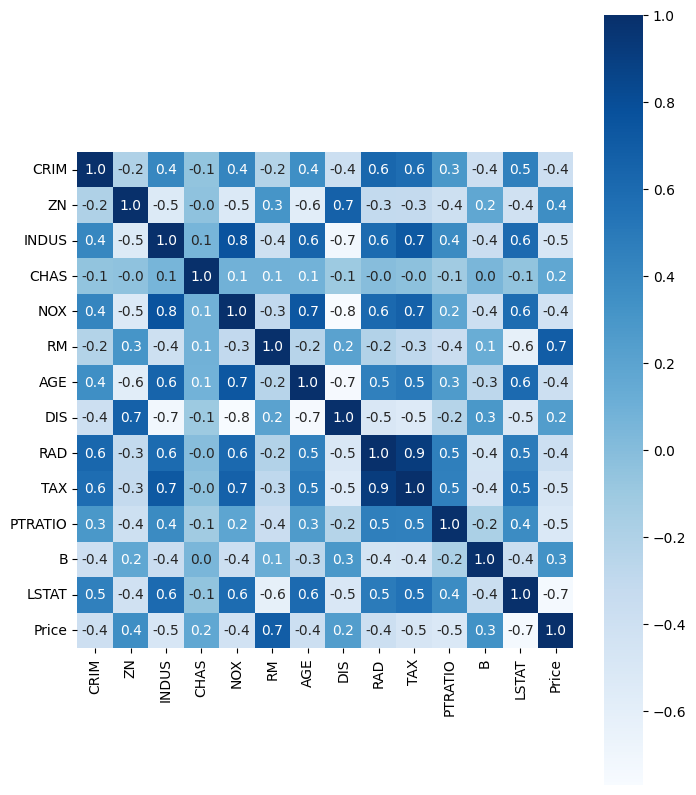

In [ ]:
plt.figure(figsize = (8, 10))
sns.heatmap(correlation,
            cbar = True, # side color bar
            square = True, # square the boxes
            fmt='.1f', # decimal numbers after decimal .1f mean 1 digit after point(.2f mean 2 digits)
            annot= True, # feartures and the values will show
            annot_kws= {'size':10}, # size of the numbers in box
            cmap='Blues')

In [ ]:
X = house_price_dataframe.drop(['Price'], axis = 1)
Y = house_price_dataframe['Price']

In [ ]:
display(X , Y)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 2)

In [ ]:
model=XGBRegressor()

In [ ]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Prediction on training data

In [ ]:
training_data_prediction = model.predict(X_train)

In [ ]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)


score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)


print("R Square error : ", score_1) # 0 mean perfect

print("Mean Absolute Error : ", score_2)

R Square error :  0.9999980039471451
Mean Absolute Error :  0.0091330346494618


## Prediction on test data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)


score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)


print("R Square error : ", score_1) # 0 mean perfect

print("Mean Absolute Error : ", score_2)

R Square error :  0.9051721149855378
Mean Absolute Error :  2.0748727686264927


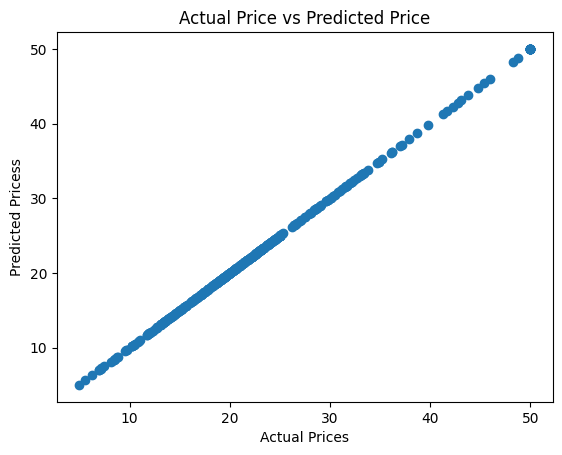

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Pricess")
plt.title("Actual Price vs Predicted Price")
plt.show()